# Spam Collection using Naive Bayes

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

### Read data

In [60]:
data = pd.read_csv('./data/sms_spam_collection/spam.csv', header=0, encoding='latin-1')
print(data.head(2))

    v1                                                 v2 Unnamed: 2  \
0  ham  Go until jurong point, crazy.. Available only ...        NaN   
1  ham                      Ok lar... Joking wif u oni...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  


### Split train data

In [61]:
X_train, X_valid, Y_train, Y_valid = train_test_split(data.v2, data.v1, random_state=0, test_size=0.2)
print(X_train.dtype)
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_train.dtype)
print(Y_valid.shape)
print(Y_valid.dtype)

object
(4457,)
(1115,)
(4457,)
object
(1115,)
object


### Count word in each sentence

{'kallis': 3697, 'home': 3308, 'ground': 3102, 'amla': 890, 'town': 6643, 'durban': 2400, 'escape': 2530, 'theatre': 6479, 'going': 3022, 'watch': 7020, 'kavalan': 3709, 'minutes': 4285, 'walked': 6985, 'moms': 4344, 'right': 5497, 'stagwood': 6113, 'pass': 4836, 'winterstone': 7140, 'left': 3867, 'victors': 6904, 'hill': 3267, 'address': 777, 'lt': 4045, 'gt': 3109, 'dunno': 2399, 'close': 1764, 'oredi': 4729, 'ìï': 7343, 'ma': 4085, 'fan': 2642, 'yo': 7300, 'im': 3437, 'work': 7195, 'ur': 6833, 'luck': 4049, 'love': 4025, 'fortune': 2821, 'loves': 4033, 'knows': 3764, 'lunch': 4056, 'menu': 4236, 'da': 2066, 'know': 3761, 'oh': 4662, 'yeah': 7279, 'diet': 2226, 'just': 3685, 'flew': 2754, 'window': 7129, 'nah': 4447, 'straight': 6190, 'bring': 1428, 'bud': 1463, 'drinks': 2366, 'actually': 768, 'little': 3953, 'useful': 6850, 'cash': 1589, 'splashmobile': 6074, 'choose': 1720, '1000s': 245, 'gr8': 3063, 'tones': 6606, 'wk': 7158, 'subscrition': 6246, 'service': 5736, 'weekly': 7063, 

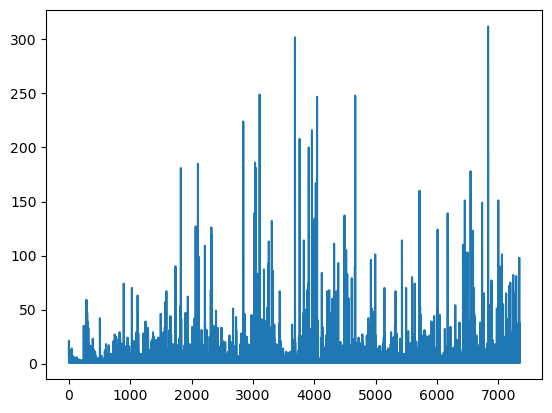

In [62]:
countVectorizer = CountVectorizer(stop_words= 'english')
X_train_count = countVectorizer.fit_transform(X_train)
X_valid_count = countVectorizer.transform(X_valid)
print(countVectorizer.vocabulary_)
# print(countVectorizer.get_feature_names_out())
print(X_train_count.toarray()[0:2])
print(pd.DataFrame(X_train_count.toarray()[0:2], columns=countVectorizer.vocabulary_.keys()))

occurence = X_train_count.toarray().sum(axis=0)
plt.plot(occurence)
plt.show()

### Train model

In [63]:
model = MultinomialNB()
model.fit(X_train_count, Y_train)
# print(Y_train.head(2))
predictions_valid = model.predict(X_valid_count)
print(predictions_valid[:10])

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam']


### Evaluate

In [66]:
# print(Y_valid.values)
# print(predictions_valid.dtype)
accuracy_score = accuracy_score(Y_valid.values, predictions_valid)
print(accuracy_score)

classification_report = classification_report(Y_valid.values, predictions_valid)
print(classification_report)


TypeError: 'numpy.float64' object is not callable

### Cross check

In [65]:
X = data.v2
Y = data.v1
c_vector = CountVectorizer()
X_word_count = c_vector.fit_transform(X)
cross_score = cross_val_score(model,X_word_count, Y, cv=10, scoring="accuracy")
print(cross_score)
print(np.mean(cross_score))


[0.98566308 0.98207885 0.97666068 0.98563734 0.97845601 0.98025135
 0.98204668 0.98384201 0.97127469 0.98743268]
0.9813343371749582
